# FIT1043 Assignment 1 - Raghav

## TASK A.1

### Initial pre-processing ###

In [1]:
# First import the required libraries
import pandas as pd
import numpy as np

# Read the csv file (in same folder) into a data frame and display the first 5 rows
df = pd.read_csv("Student_List_A2.csv")
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1


The code below changes the Gradeclass column from having a numerical grade representation to a letter grade. 
This change is *not* in place, hence the df["GradeClass"] must be set to the returned value

In [2]:
df["GradeClass"] = df["GradeClass"].replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'F'})
df["GradeClass"].unique()

array(['B', 'F', 'D', 'C', 'A'], dtype=object)

In [3]:
df["GradeClass"].value_counts()

GradeClass
F    1065
C     352
D     344
B     242
A      97
Name: count, dtype: int64

### Data quality issues ###

As shown by the data frame information below, there are 2100 entries (rows), and all columns apart from "StudyTimeWeekly" have 2100 non-null values. Thus the only missing values occur in the StudyTimeWeekly column, with a total of 21 missing values that need to be replaced.
This is shown even more clearly using df.isnull().sum() which displays the total number of null values for each of the columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2100 non-null   int64  
 1   Age              2100 non-null   int64  
 2   StudyTimeWeekly  2079 non-null   float64
 3   Absences         2100 non-null   int64  
 4   ParentalSupport  2100 non-null   int64  
 5   GPA              2100 non-null   float64
 6   GradeClass       2100 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 115.0+ KB


In [5]:
df.isnull().sum()

StudentID           0
Age                 0
StudyTimeWeekly    21
Absences            0
ParentalSupport     0
GPA                 0
GradeClass          0
dtype: int64

Now, replace the null values in "StudyTimeWeekly" with the median of that column. Note that "inplace=True" could have been used rather than returning and updating the StudyTimeWeekly column, however this will not be supported in later pandas versions!

In [6]:
median_val = df["StudyTimeWeekly"].median()
df["StudyTimeWeekly"] = df["StudyTimeWeekly"].fillna(median_val)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2100 non-null   int64  
 1   Age              2100 non-null   int64  
 2   StudyTimeWeekly  2100 non-null   float64
 3   Absences         2100 non-null   int64  
 4   ParentalSupport  2100 non-null   int64  
 5   GPA              2100 non-null   float64
 6   GradeClass       2100 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 115.0+ KB


Checking the data in general (using describe) to determine any initial abnormalities and data quality issues

In [7]:
df.describe()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,2062.840952,16.475238,9.674452,14.709048,2.116190,1.892345
std,626.957633,1.124823,5.639223,11.153253,1.120141,0.908335
min,1002.000000,15.000000,0.004859,-122.000000,0.000000,0.000000
25%,1526.750000,15.000000,4.931210,7.000000,1.000000,1.173660
50%,2051.500000,16.000000,9.513101,15.000000,2.000000,1.883797
75%,2576.250000,17.000000,14.284235,22.000000,3.000000,2.605279
max,3392.000000,18.000000,19.978094,320.000000,4.000000,4.000000


Since StudentIDs can be any positive integer, there does not seem to any clear data abnormalities (since the min is positive). The range of student's ages is also valid (15-18 years old). The weekly student study time distribution also does not highlight any abnormalities (from 0 hours to 20 hours). Parental support is classified as a scale from 0 to 4, which is supported by the minimum and maximum, posing no clear abnormalities. The GPA column also has a valid range from 0.00 to 4.00.

However we can see that the min value for Absences is '-122'. This does not make sense in the context since the number of yearly student absences must be a non-negative integer. However this might occur in student data sets due to numerous reasons.
1. The data entry may have accidentally prepended the '-' in front of the value and it was intended to be 122
2. The column may have been mis-interpreted for this particular value, and may represent the change in absences for the student from the previous year. Although this is unlikely, it may potentially occur if each data entry was entered by different individuals and hence there was misunderstanding in the meaning of the column names. 
3. The data may have been entered as the number of absences away from the full 365 days and actually represents 243 absences. 

In [8]:
df[df["Absences"] < 0]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
1001,2003,15,0.806505,-122,3,3.20171,B


Due to the limited information regarding the collection and sourcing of the number of student absences, the rows with negative values in the "Absences" column, should be removed. Although this results in a lower number of data values available for use in predictive models, the consequence of erroneous data outweighs this. Furthermore, the assignment specifications state that all entries with data quality issues must be removed. 

We can see that there is only one reported negative number of student absences and hence only the row number 1001 needs to be deleted. This can be done by updating the dataframe to only contain entries that have an "Absences" value which is non-negative. 

In [9]:
df = df[df["Absences"] >= 0]

As we can see below, there are no more negative values for Absences. 

In [10]:
df[df["Absences"] < 0]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass


From the describe method, we can also see the extremely high maximum value of 320 absences by a student in a single year. This is also impractical in the context of the number of absences across a **school year** which consists of around 200 days, making it impossible for a student to be absent from school for 320 days. 
This may occur in student data sets due to a variety of potential reasons including:
1. The data value was incorrectly typed and was intended to be a lower valid value in the range of 0-200
2. 'Absences' was misinterpreted as 'number of days the student did not go to school', which would result in holidays and breaks being included in the absences count
3. The absences count of 320 applies to more than just a single school year for that student

In [11]:
df[df["Absences"] > 200]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
112,1114,16,16.849282,320,1,1.919956,F


We can see that there is only a single entry where the number of absences is greater than 200, which likely indicates that the entry was entered incorrectly, rather than a systematic misinterpretation of the absences column. Hence, this entry should be removed, in accordance with the assignment specifications. 

In [12]:
df = df[df["Absences"] <= 200]
df["Absences"].describe()

count    2098.000000
mean       14.628694
std         8.434995
min         0.000000
25%         7.000000
50%        15.000000
75%        22.000000
max        29.000000
Name: Absences, dtype: float64

### GPA or Gradeclass? ###

The GPA (score) is more likely to be correct compared to the GradeClass (from A to F), as this is directly measured as a continuous numerical variable. The letter grade is then formed from this GPA score which introduces sources of errors if incorrectly classifying the scores.

For example, if a student scored a GPA of 3.4873 and had a classified grade of 'A', it is more likely that this score was incorrectly classified as being greater than 3.5, rather than the score being incorrectly entered into the dataset. 

In [13]:
# This function checks highest to lowest grades and returns the correct letter grade
# Note: The function could be optimised using relevant data structures (e.g., dictionary), but it has been constructed simply for readability
def calculate_correct_grade(gpa):
    if gpa >= 3.5:
        return 'A'
    elif gpa >= 3:
        return 'B'
    elif gpa >= 2.5:
        return 'C'
    elif gpa >= 2:
        return 'D'
    else:
        return 'F'
# Create a new column that represents the calculated grades based off the GPA score
df["CalculatedGradeClass"] = df["GPA"].apply(calculate_correct_grade)
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass,CalculatedGradeClass
0,1002,18,15.408756,0,1,3.042915,B,B
1,1003,15,4.210570,26,2,0.112602,F,F
2,1004,17,10.028829,14,3,2.054218,D,D
3,1005,17,4.672495,17,3,1.288061,F,F
4,1006,18,8.191219,0,1,3.084184,B,B


Now compare the calculated and correct grades with the entered grades. The following code displays all the entries that have classified the letter grade incorrectly. 

In [14]:
df[df["GradeClass"] != df["CalculatedGradeClass"]]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass,CalculatedGradeClass
2000,3182,15,3.253044,13,1,1.844056,B,F
2001,3183,17,17.086920,25,2,1.305585,C,F
2002,3189,16,5.697054,9,1,2.459805,B,D
2003,3193,16,15.827054,28,1,0.818126,C,F
2004,3195,15,15.615710,26,3,1.174610,A,F
...,...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,B,F
2096,3388,18,10.680555,2,4,3.455509,A,B
2097,3390,16,6.805500,20,2,1.142333,C,F
2098,3391,16,12.416653,17,2,1.803297,B,F


As we can see, the last 100 entries all have an incorrect letter grade compared to the calculated grade, which further supports the hypothesis that the GPA scores are correct and the classified GradeClass may be incorrect. 
A possible explanation for these 100 entries to be incorrect is that a cascading (chaining) error occurred towards the end of the data set, which resulted in all the last 100 entries to have an incorrect grade. 

In [15]:
df["GradeClass"] = df["CalculatedGradeClass"]
# After correcting the GradeClass column, there should be no incorrect grades in GradeClass
df[df["GradeClass"] != df["CalculatedGradeClass"]]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass,CalculatedGradeClass


Now we can remove the "CalculatedGradeClass" column

In [16]:
df = df.drop("CalculatedGradeClass", axis=1)
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


## TASK A.2 ##

### Visualisations and Correlations ###

To calculate the percentages for each category in GradeClass, first calculate the counts for each of the letter grades (A to F) and then divide by the total number of grade class entries (2099) and then multiply by 100 (in order to get a percentage).

In [17]:
grade_class_percentages = df["GradeClass"].value_counts() * 100 / len(df["GradeClass"])
grade_class_percentages

GradeClass
F    53.622498
D    17.588179
C    16.158246
B     9.723546
A     2.907531
Name: count, dtype: float64

To create a piechart from the GradeClass distribution, we need to import 'pyplot' and then use the calculated percentages (see above). To include labels (A-F), we simply need to refer to the indices of 'grade_class_percentages' and `autopct='%1.1f%%'` shows the percentages to 1 decimal place.

Text(0.5, 1.0, 'Grade Class Student Distribution')

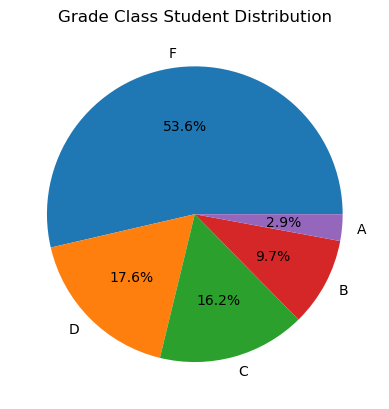

In [18]:
import matplotlib.pyplot as plt
plt.pie(grade_class_percentages, labels=grade_class_percentages.index, autopct='%1.1f%%')
plt.title("Grade Class Student Distribution")

As we can see, the percentages are the same as calculated above, however they have been rounded to 1 decimal place

In [19]:
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


First the variables "StudyTimeWeekly" and "GPA" will be analysed separately to draw observations and then their relationship will be analysed through a scatterplot.

As we can see the distribution of student weekly study time is approximately symmetrical around the modal category (8-10 hrs/week). There are no clearly observable outliers in the data. The data is well spread from 0 to 20 hours a week, making the range = 20 hours (to the nearest whole number).

<Axes: >

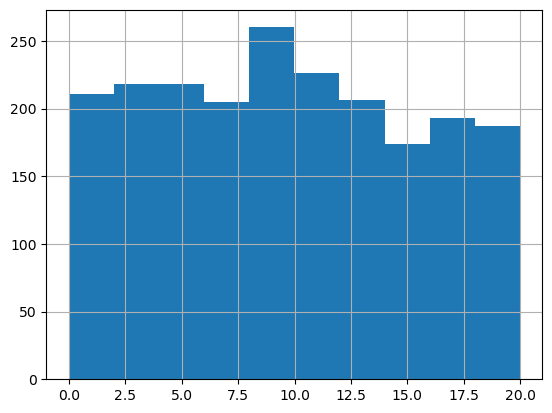

In [20]:
df["StudyTimeWeekly"].hist(bins=10)

Increasing the number of bins (categories represented by blocks) shows no clear patterns and we can see that there are many students studying very little (less than 5 hours a week) and many students also studying for long periods (more than 15 hours a week)

<Axes: >

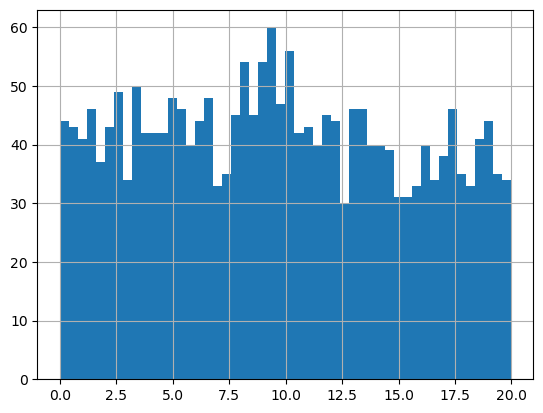

In [21]:
df["StudyTimeWeekly"].hist(bins=50)

Now looking at the distribution for student GPA scores, we can see that it is also approximately symmetrical and has its modal category as 2.0 - 2.4. The GPA distribution follows the expected "bell-curve" pattern with most of the students centred around the middle (1.4 to 2.8) and tailing towards either end (0.0 and 4.0).

<Axes: >

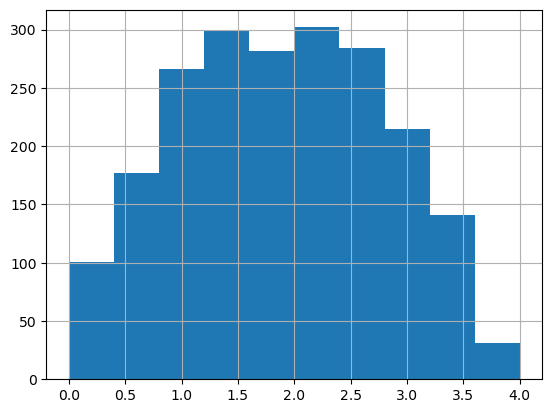

In [22]:
df["GPA"].hist(bins=10)

<Axes: >

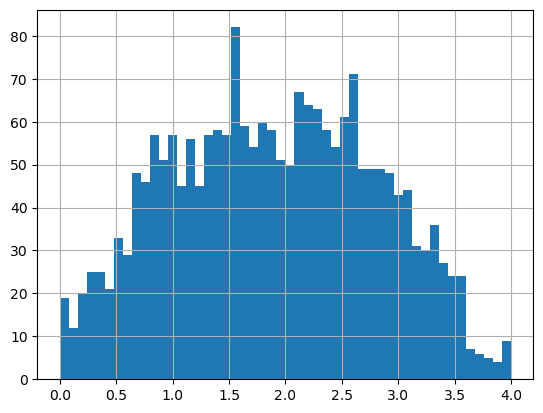

In [23]:
df["GPA"].hist(bins=50)

Since both variables "StudyTimeWeekly" and "GPA" are numerical variables, a scatterplot must be used (rather than histograms, barcharts, boxplots etc) to display their relationship. A histogram or boxplot could be used if only one of the numerical variables were being analysed, however to see the relationship/correlation betweeen two numerical variables, a scatterplot should be used.

From the scatterplot below, the relationship between study time and GPA seems unclear due to their extremely weak correlation. However, we can see a very slight positive direction with the largest GPA scores being towards the positive end of "Weekly Study Time" and the lowest GPA scores being towards the negative end of "Weekly Study Time".

Text(0, 0.5, 'GPA')

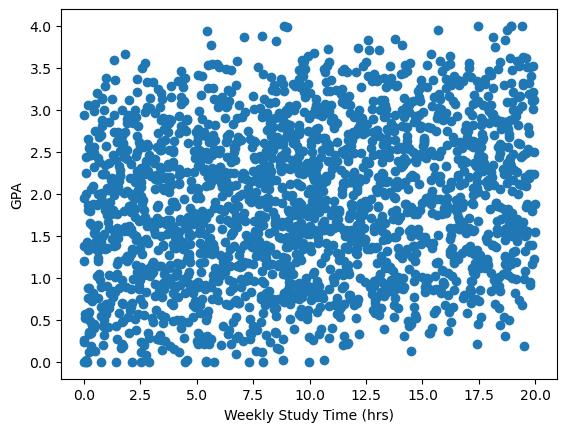

In [24]:
plt.scatter(df["StudyTimeWeekly"], df["GPA"])
plt.xlabel("Weekly Study Time (hrs)")
plt.ylabel("GPA")

To clarify the relationship from the scatterplot, we can refer to numerical and objective statistical measures and linear regression.

In [25]:
dfWeeklyStudyGPA = df[["StudyTimeWeekly", "GPA"]]
dfWeeklyStudyGPA.head()

,StudyTimeWeekly,GPA
0,15.408756,3.042915
1,4.210570,0.112602
2,10.028829,2.054218
3,4.672495,1.288061
4,8.191219,3.084184


As we can see below the Pearson's correlation coefficient (r) for the relationship is 0.179 which indicates a **weak positive linear** relationship.

In [26]:
dfWeeklyStudyGPA.corr()

,StudyTimeWeekly,GPA
StudyTimeWeekly,1.000000,0.179058
GPA,0.179058,1.000000


### Visualising another feature ###

We can quickly observe the strength and direction of the relationship between all pairs of numerical variables as shown below.

In [27]:
# Ensure that only numerical features are selected
dfNumerical = df.select_dtypes(include=[np.number])
dfNumerical.corr()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA
StudentID,1.000000,-0.041623,0.007003,0.039000,-0.005515,-0.032004
Age,-0.041623,1.000000,-0.009729,-0.009201,0.025664,-0.002336
StudyTimeWeekly,0.007003,-0.009729,1.000000,0.006508,0.034076,0.179058
Absences,0.039000,-0.009201,0.006508,1.000000,0.003967,-0.919779
ParentalSupport,-0.005515,0.025664,0.034076,0.003967,1.000000,0.186763
GPA,-0.032004,-0.002336,0.179058,-0.919779,0.186763,1.000000


As we saw above the Pearson's correlation coefficient (r) for the relationship between GPA and number of absences is -0.92 which indicates a strong negative linear relationship. 

In [28]:
dfNumerical["GPA"].corr(df["Absences"])

np.float64(-0.9197788569386008)

To visualise the scatterplot:

Text(0, 0.5, 'GPA')

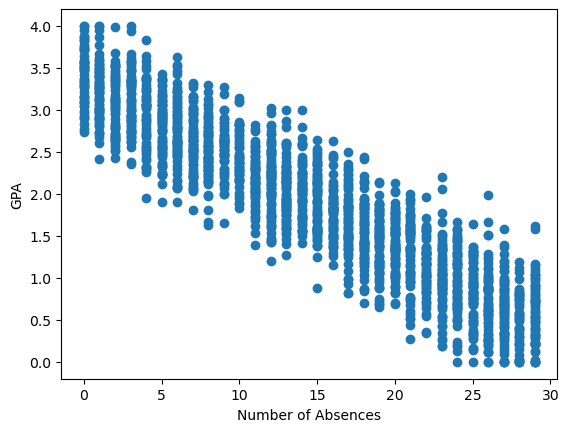

In [29]:
plt.scatter(df["Absences"], df["GPA"])
plt.xlabel("Number of Absences")
plt.ylabel("GPA")

As shown by the scatterplot, there is a strong negative linear relationship between Absences and GPA, with a higher number of absences being correlated with a lower GPA score.
This makes logical sense in the context of student attendance and academic performance, where we would expect students who have a higher attendance rate (low number of absences) to perform better academically and thus recieve a higher GPA. This is because students who have a high attendance rate would likely be more academically driven and would also have greater access to resources that would enable them to achieve higher GPA scores. 

### Correlation vs Causation ###
Although there is a clear correlation between student absences and GPA score, we cannot conclude causation between these variables (i.e., that decreasing student absences directly **causes** an increase in GPA score). This is because both of these variables may be influenced by an underlying third variable which is the driving cause for the changes in the dependent variable (GPA).

For example, suppose through experimentation and research (additional data), it was proved that strong organisation skills caused students to have a greater academic performance and a greater GPA score than weak organisation skills. A byproduct of students being more organised, they would attend more classes and thus have a lower attendance rate. 

Hence although the lower number of absences is **correlated** with a higher GPA score, the low number of absences does **not cause** a student to have a high GPA, but rather the student's organisation skills affected both variables. Additional experimental data that kept potential confounding variables (such as organisation skills) constant amongst two student groups that only differ by number of absences would be beneficial in determining a causal relationship between absences and GPA.

To group the dataframe by GradeClass and then calculate the mean, median, std, IQR for both GPA and Absences in a single call, the following must be done:
- Group the data into the grade categories : `df.groupby()`
- Choose the (list of) columns to consider: `[["GPA", "Absences"]]`
- Enter the statistical methods required in the form:`agg([(function, how_to_calculate)])`
  *Note: mean, median, std are already built in functions so the calcualtion does not need to specified*
- Determine how to calculate IQR = Q3 - Q1: `lambda x: x.quantile(0.75) - x.quantile(0.25)`

In [30]:
grade_info = df.groupby('GradeClass')[['GPA', 'Absences']].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))
])

Alternatively, the same computation could be expressed as follows for greater readability (and also aligning to the approach in lectures!). 
The code below uses a dictionary to determine which functions need to be computed for each chosen column. This allows greater flexibility for choosing different statistical methods depending on the column, however in this case where the same methods are used for both "GPA" and "Absences", this is not required. 

In [31]:
df.groupby('GradeClass')[['GPA', 'Absences']].agg(
    {
        "GPA":["mean", "median", "std", ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25))],
        "Absences":["mean", "median", "std", ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25))]
    }
)

GPA                                 Absences         \
                mean    median       std       IQR       mean median   
GradeClass                                                             
A           3.681490  3.618273  0.163589  0.275281   1.475410    1.0   
B           3.227285  3.219432  0.143109  0.242832   3.308824    3.0   
C           2.732964  2.723828  0.145818  0.250655   6.433628    6.0   
D           2.249837  2.240924  0.137388  0.230745  11.140921   11.0   
F           1.181513  1.234141  0.513394  0.788061  21.008000   21.0   

                           
                 std  IQR  
GradeClass                 
A           1.659383  3.0  
B           2.500782  4.0  
C           3.562318  5.0  
D           3.783787  6.0  
F           5.033246  8.0

To 'flatten' and tidy the data frame with single level columns:

In [32]:
# Remove the top level (GPA, Absences)
grade_info.columns = grade_info.columns.droplevel(0)
# Update columns - based of knowledge of order
grade_info.columns = ["GPA_mean", "GPA_median", "GPA_std", "GPA_IQR", "Absences_mean", "Absences_median", "Absences_std", "Absences_IQR"]
grade_info

,GPA_mean,GPA_median,GPA_std,GPA_IQR,Absences_mean,Absences_median,Absences_std,Absences_IQR
GradeClass,,,,,,,,
A,3.681490,3.618273,0.163589,0.275281,1.475410,1.0,1.659383,3.0
B,3.227285,3.219432,0.143109,0.242832,3.308824,3.0,2.500782,4.0
C,2.732964,2.723828,0.145818,0.250655,6.433628,6.0,3.562318,5.0
D,2.249837,2.240924,0.137388,0.230745,11.140921,11.0,3.783787,6.0
F,1.181513,1.234141,0.513394,0.788061,21.008000,21.0,5.033246,8.0


However, this approach of hardcoding the column names is error-prone to potential typos or confusion in ordering, hence the following code does the tidying process much more efficiently.

The code below relies on the multi-index columns being iterable, providing the tuples (level0, level1) that can be used in formatted strings for creating the new column names. 

In [33]:
# Get original grade_info with multi-index columns
grade_info = df.groupby('GradeClass')[['GPA', 'Absences']].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))
])

# Store the old column names and add the new formatted names into list
original_columns = grade_info.columns
new_columns = []
for (variable, statistical_measure) in original_columns:
    # Make the new column name the FeatureVariable_StatisticalMethod (i.e, GPA_mean)
    new_columns.append(f"{variable}_{statistical_measure}")

# Update the grade info columns to the new names
grade_info.columns = new_columns
grade_info

,GPA_mean,GPA_median,GPA_std,GPA_IQR,Absences_mean,Absences_median,Absences_std,Absences_IQR
GradeClass,,,,,,,,
A,3.681490,3.618273,0.163589,0.275281,1.475410,1.0,1.659383,3.0
B,3.227285,3.219432,0.143109,0.242832,3.308824,3.0,2.500782,4.0
C,2.732964,2.723828,0.145818,0.250655,6.433628,6.0,3.562318,5.0
D,2.249837,2.240924,0.137388,0.230745,11.140921,11.0,3.783787,6.0
F,1.181513,1.234141,0.513394,0.788061,21.008000,21.0,5.033246,8.0


## TASK A.3 ##

### Supervised Learning ###

Supervised learning is a branch of machine learning that involves prediction of a particular attribute given training data alongside their correct attributes. It aims to predict a particular output for unseen data based off patterns and characteristics between its training data and their expected outputs. 

Training: The process of 'teaching' the chosen model how to generate its output based off a particular input, by supplying the model with sample input and output pairs

Testing: The evaluation of a trained model based off its generated outputs to a set of (unseen) input data. The closer the generated outputs are to the true values, the better the model is. 

**Risk of not holding a test set** :
A potential risk of not holding out a separate unseen test set is that the model could overfit to the supplied data. This means that the model may be able to accurately generate correct outputs for every input data provided, however it does not generalise patterns and relationships to other 'real-world' data and hence would perform poorly on new data sets. This is because an overfit model would attempt to cover all data values including noise and random fluctuations, making it deviate from the true trends or patterns from the data. 


In [34]:
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


### Column Use in Model ###
- Student ID: **Exclude**, since this is a unique identifier and is not a measurement. Hence, within this context, there is no correlation or predictive ability from a student's ID to their GradeClass, and including this column would likely lead to weaker predictions by the model.
- Age: **Include**, since a student's age could potentially affect learning and academic performance, and thus would be a beneficial feature in predicting GradeClass
- StudyTimeWeekly: **Include**, since this is a likely factor in influencing academic performance. Amount of time spent studying is likely to be positively correlated with GradeClass and GPA, hence this will be included
- Absences: **Include**, this was shown through the previous analysis to have a strong negative correlation with GPA, hence it will also be correlated with GradeClass since this is derived from the GPA. 
- ParentalSupport: **Include**, since the level of parental support could possibly play a role in student's mental wellbeing and could thus affect their GradeClass. 
- GPA: **Exclude**, since this contains direct overlap with the GradeClass, as GradeClass is directly derived from the GPA category, and hence there would be no use of prediction if GPA was available for use.
- GradeClass: **Exclude** This is what we are trying to predict, so we will not have this as an input feature

### Splitting data into test and train ###

First we need to establish the X and y data sets. The X data set should contain features that may help predicting the grade class (Age, StudyTimeWeekly, Absences, ParentalSupport), while the y data set should contain the GradeClass letters for each student.  

These X and y data sets should only contain the values of the features (for use in predictive models) rather than being a dataFrame or Series. Hence we use `.values`

In [35]:
# Uppercase X for matrix and lowercase y for vector is naming convention. 
# Using iloc allows us to specify which column/row indices are needed (not using their name)

# For X features, we use all rows [:] and the 'include' features mentioned above [1,2,3,4]
X = df.iloc[:, [1,2,3,4]].values
# For y features, we use all rows[:] and just "GradeClass" which has an index of 6
y = df.iloc[:,6].values

print("X:", X)
print("y:", y)

X: [[18.         15.40875606  0.          1.        ]
 [15.          4.21056977 26.          2.        ]
 [17.         10.02882947 14.          3.        ]
 ...
 [16.          6.80549965 20.          2.        ]
 [16.         12.41665266 17.          2.        ]
 [16.         17.81990749 13.          2.        ]]
y: ['B' 'F' 'D' ... 'F' 'F' 'D']


Use the train_test_split to randomly divide the X and Y data sets into train data (for use in developing the model) and test data (for use in evaluating the model). Since we want 70% of the data to be used in training and 30% to be used for testing, we specify the test_size to be 0.3. 
Initialising the random_state allows the same test split to be generated repeatedly (allowing reproducibility of results).

In [36]:
from sklearn.model_selection import train_test_split

# Input training data, input testing data, output training answer, output testing answer
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

To check the number of samples in the training and test sets we can simply check the length (number of rows) for the X_train and X_test (note the y datasets must have the same number of samples since they correspond to the X datasets).

In [37]:
len(X_train)

1468

In [38]:
len(X_test)

630

We can see that there are **1468** samples used in training and **630** samples used in testing. As expected this is 70% and 30% of the total sample size (2098) respectively.

### For a very small dataset ###
If the dataset was very small (e.g., less than 100) using a 70/30 split for training and testing respectively would generate an insufficient amount of data for valid model development and testing. 
Hence, cross-validation would be a much better approach for training and testing models, since it makes use of all data for both training and testing while also ensuring that the model does not overfit to the given data (uses subsets of data to train).

First a fold size (i.e., size of test set) is chosen and the data set is split into various different blocks of this fold size. We can then pick a particular block of the data as the test set, and use the remaining data to train the model. 
After the trained model has been evaluated on the test set, we can repeat the process using a different test set block (and consequently a different training data batch), keeping track of the model performance each time. 

Hence this allows extensive training and testing on a small data set, which would otherwise be infeasible using a simple 70/30 split.

## TASK A.4 ##

### Normalisation ###
Normalisation/scaling is extremely important for data sets with multiple input variables (like this student dataset) that have different scales for each variable. This is because without normalisation, variables with a large scale will dominate other variables (due to their larger numerical values) and hence the prediction will be highly influenced by these variables, and less influenced with variables with a small scale. 
Normalisation ensures that all variables have a mean of 0 and a standard deviation of 1, so all input variables contribute equally to the prediction.

For example, consider the features "Age" and "Absences.
  

In [39]:
df["Age"].describe()

count    2098.000000
mean       16.476168
std         1.124850
min        15.000000
25%        15.000000
50%        16.000000
75%        17.000000
max        18.000000
Name: Age, dtype: float64

In [40]:
df["Absences"].describe()

count    2098.000000
mean       14.628694
std         8.434995
min         0.000000
25%         7.000000
50%        15.000000
75%        22.000000
max        29.000000
Name: Absences, dtype: float64

For example, consider the features "Age" and "Absences.
- Student ages are between 15 - 18, with a mean of 16 and standard deviation of 1(small scale)
- Number of student absences are between 0 - 29, with a mean of 15 and standard deviation of 8(larger scale)

Despite having a similar mean, "Absences" has a significantly larger spread and has much larger numerical values. 
Without normalisation, the larger values in "Absences" will influence the predictive model compared to the smaller values in "Age", even if the age value is relatively high for its distribution (i.e., has a high standard deviation). 

With normalisation, all features will be converted to a mean of 0 and standard deviation of 1, so that large values **for their particular distribution** are appropriately highlighted and influence the predictive model more, despite if they were truly large number or not.

### Columns to normalise ###
All numerical input data columns (X variable) need to be normalised as these are fed into the model to predict the GradeClass and hence should be given equal weighting. 

Normalising the Y variable (GradeClass) is not needed since this is the output value and should be easily interpretable.

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Separately normalise the train and test data to ensure complete independence (training data should not give any information about test data)
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)   

### Support Vector Machine (SVM) Algorithm ###

The SVM model is a supervised classification method that raises the input data to a higher dimension and attempts to fit a classifier (specified by the kernel) to accurately distinguish between the different classes of data (for the student data this would involve the letter grade). This involves finding an optimal hyperplane to separate the different classes by ensuring maximal distance/margin between two points of different classes. 
A hyperplane can be thought of as a boundary across N dimensions (depending on number of features) that divides data. For example, if there were simply two features to consider, it would be 2 dimensional and hence a normal line could be used as a boundary. 

A kernel is the specific function that transforms the input data into a higher dimension, allowing a Support Vector Classifier to be trained to divide the input data into its classes efficiently. This is useful if it is not possible to effectively divide the data into classes linearly and hence an appropriate transformation to particular feature(s) may then allow easier linear separation. Kernels can determine the marginal distances and find similarity between data points in the higher dimensions without actually transforming each individual data point using the 'kernel trick', to make the computations more efficient. 

In [42]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)

In [43]:
svm_model.fit(X_train, y_train)

SVC(random_state=0)

In [44]:
svm_model.score(X_test, y_test)

0.7428571428571429

As we can see, using the default parameters for the svm_model results in an accuracy of approximately 0.74 on the test data. Although this shows a competent ability to draw patterns between the input features and GradeClass, there is still significant scope for improvement

In [45]:
kernels_to_try = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels_to_try:
    print("Kernel:", kernel)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

Kernel: linear
0.7634920634920634
Kernel: rbf
0.7428571428571429
Kernel: poly
0.7317460317460317
Kernel: sigmoid
0.665079365079365


After quickly looking at some of the kernel options for the SVM, we can see that the linear kernel option seems to have the highest score on the test data. The kernels 'rbf' and 'poly' seem similar in scores hence other optimisations could potentially be performed on these kernels to maximise the scores, however the 'sigmoid' kernel performed extremely poorly compared to the other options and hence is likely not well suited to this particular dataset. 

### Learning about SVM parameters ###
- Kernel: this was explained in more detail above. However this is simply a mechanism to convert non-linear datasets into linear problems using particular transformations. 
- Regularisation parameter (C): essentially determines how large margin vs how low misclassification is needed. A large value for C means that we prioritise correct classification of data even if it results in a small margin (different classes have data points close to each other with little separation). On the other hand, a small value for C means we have a large margin but a high misclassification rate.
- Degree (for polynomial kernel): changes the complexity and flexibility of the polynomial transformation. A high degree results in a more flexible boundary. However this may lead to overfitting so must be increased cautiously!
- Gamma (non-linear kernels): determines level of fitting. A high gamma value tries to fit the boundary as close to the training data as possible (this may cause overfitting).

We can perform more extensive searches using RandomSearch which randomly and quickly analyses combinations of parameters and their ranges that we specify. 

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid to search
parameters_grid = {
    'C': [10**i for i in range(-3,3)],  # Generates a range of values for the different powers of 10 (from 10^-3 to 10^3)                  
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly']        
}
print("Running Random Search")
# Conduct random search across SVC model for all the parameter values above, and measure best model based on highest accuracy score
rand_search = RandomizedSearchCV(
    estimator=SVC(random_state=0),
    param_distributions=parameters_grid,
    scoring='accuracy', 
)
rand_search.fit(X_train, y_train)

# Print the optimal parameters that were found via grid search 
print("Best parameters:",  rand_search.best_params_)

# Use the best model
best_svm_model = rand_search.best_estimator_
print ("Best estimator model score:", best_svm_model.score(X_test, y_test))

Running Random Search
Best parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
Best estimator model score: 0.7492063492063492


After running the Random Search numerous times, we notice that we constantly get different parameters that have significant ranges, making it difficult to confidently assume that a particular kernel or a particular range of values (for gamma/C) is the most optimal. 

For example, a few checks displayed the following:
- kernel: rbf, gamma: 0.001, C:100, **score** = 0.765
- kernel: rbf, gamma: 0.01, C:100, **score** = 0.749
- kernel: linear, gamma: 0.001, C:0.1, **score** = 0.763
 
To solve this issue with the randomness, we can use a grid search that searches every possible combination of values (which will be more computationally intense but will definitely get the highest score).

In [47]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
parameters_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],                    
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly']        
}
print("Running Grid Search")
# Conduct grid search across SVC model for all the parameter values above, and measure best model based on highest accuracy score
grid_search = GridSearchCV(
    estimator=SVC(random_state=0),
    param_grid=parameters_grid,
    scoring='accuracy'      
)
grid_search.fit(X_train, y_train)

# Print parameters and score
print("Best parameters:",  grid_search.best_params_)

# Use the best model
best_svm_model = grid_search.best_estimator_
print ("Best estimator model test score:", best_svm_model.score(X_test, y_test))

Running Grid Search
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best estimator model test score: 0.765079365079365


From the selection of parameter values provided, this seems to be the best model (with the highest score on testing data).
Although this selection also appeared in the RandomisedSearch and was the highest among all other selections, we could not definitively conclude that it was the best combination of values until we ran a full grid search testing all possible combinations. 

In [48]:
# Most optimised model from the grid search
optimised_svm_model = SVC(C=100, gamma=0.001, kernel='rbf', random_state=0)
optimised_svm_model.fit(X_train, y_train)

print("Train score:", optimised_svm_model.score(X_train, y_train))
print("Test score:", optimised_svm_model.score(X_test, y_test))

Train score: 0.7663487738419619
Test score: 0.765079365079365


Since the test and train scores are very similar we can also safely assume that the model **has not overfit** to the training data 

### Decision Tree Classification ###

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
dt_model.score(X_test, y_test)

0.6888888888888889

As we can see, the default decision tree classifier performs significantly poorly on the test data compared to the SVM trained model. To increase classification performance, we could run many individual decision trees (from random samples of our data features) and combine them into a random forest.

### Random forests ###

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
rf_model.score(X_test, y_test)

0.7174603174603175

As expected, the random forest performed significantly better compared to the individual decision tree however it is still a lower score compared to the optimised SVM model. To make the random forest better we can use GridSearch, similar to the SVM model. 

### Learning about RF parameters ###
- **n_estimators**: The total number of decision trees inside the random forest. More trees will typically lead to better accuracy and performance since different samples of the training data and different selected features will be used. However, this will increase time for training and predictions.
- **max_depth**: Sets the maximum depth of any particular decision tree. Similar logic to overfitting/underfitting to min_samples_split. A high max_depth means that trees can branch out further and have more patterns, while a low max_depth means trees stop after a certain number of splits. 
- **min_samples_split**: Determines the minimum number of samples required at a particular node in order to split further. A high min_samples_split value means the decision tree will split less (avoids overfitting but may underfit). A low min_samples_split value means that the decision tree will split more, even if there are very few samples left to consider (may overfit). 
- **min_samples_leaf**: Determines the minimum number of samples that must fit into a final leaf node. If there are too little samples in a leaf node, that decision may not be very good (i.e, if it only separates one sample) and can lead to overfitting because it tries to perfectly work on the training data.
- **max_features**: States the number of features considered within each decision tree. If most of the original features are used, then most of the trees may behave similarly, increasing variance. If a very few features are used per decision tree, the model may act too randomly and underfit to the data, increasing bias. This is typically represented as the square root/logarithm of the number of features, which should not affect this dataset significantly since there are very few X features (4), and both of these will return 2. 
- **boostrap**: Determines if the sampling process for the decision trees is with or without replacement. Setting bootstrap to true, means each data entry is sent back to the original data pool after selection in a decision tree, allowing for more random samples (samples may contain duplicates of particular entries)

In [53]:
# Define parameter grid values to search over 
parameters_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [50, 100, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 4, 5],
    'bootstrap': [True, False]
}
print("Running Random Search")
# Conduct search across random forest model for all the parameter values above, and measure best model based on highest accuracy score
rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_distributions=parameters_grid,
    scoring='accuracy', 
)
rand_search.fit(X_train, y_train)

# Print the optimal parameters that were found via grid search 
print("Best parameters:",  rand_search.best_params_)

# Use the best model
best_rf_model = rand_search.best_estimator_
print ("Best estimator model score:", best_rf_model.score(X_test, y_test))

Running Random Search
Best parameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': False}
Best estimator model score: 0.753968253968254


After running the random search a few times we can see that frequently:
- n_estimators = 500 (which is expected as more decision trees will tend to lead to greater accuracy)
- bootstrap = True (which is also expected since sampling with replacement will generate varied samples from a single dataset)
- max_depth = None (since min_samples_split will typically decide when to stop splitting)

To determine the best parameter values for the other parameters we can run a grid search

In [54]:
# Define parameter grid to search - this should only include the parameters we are unsure about
parameters_grid = {
    'min_samples_split': [7, 10, 12, 15],
    'min_samples_leaf': [3, 4, 5]
}
print("Running Grid Search")
# Conduct grid search across parameters and measure best model based on highest accuracy score
# Note: for faster computations, we use n_estimators=100 since the patterns on parameters would remain approximately the same even with less decision trees. 
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators=100, max_depth=None, bootstrap=True, random_state=0),
    param_grid=parameters_grid,
    scoring='accuracy',       
)
grid_search.fit(X_train, y_train)

# Print parameters and score
print("Best parameters:",  grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_
print ("Best estimator model test score:", best_rf_model.score(X_test, y_test))

Running Grid Search
Best parameters: {'min_samples_leaf': 4, 'min_samples_split': 12}
Best estimator model test score: 0.7603174603174603


In [55]:
best_rf_model.score(X_train, y_train)

0.8521798365122616

We can see that we have heavily overfit the data based off the parameters since the when scores on the train data, the model performs extremely well(0.85), and when tested on the unseen test data it performs relatively poorly (0.76). This was unexpected since the grid search should search for best parameters using cross validation and hence should be unlikely to overfit. 

Yet, the presence of overfitting indicates that the random forest decision trees do not have much difference amongst them leading to high variance and overfitting. To counter this, we should likely decrease the max depth or increase the min_samples_split (so that the trees must generalise patterns rather than memorise specific patterns with many decisions). 

In [56]:
# Increasing the min_samples_split 
optimised_rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_depth=None, bootstrap=True, random_state=0)
optimised_rf_model.fit(X_train,y_train)
print("Train score:", optimised_rf_model.score(X_train,y_train))
print("Test score:", optimised_rf_model.score(X_test,y_test))

Train score: 0.8331062670299727
Test score: 0.7666666666666667


We can see that although this model still has overfitting, the score has improved and overfitting has reduced making it better than the original model.

In [57]:
# Finally, increase the number of estimators (balance computation and accuracy)
optimised_rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=15, min_samples_leaf=4, max_depth=None, bootstrap=True, random_state=0)
optimised_rf_model.fit(X_train,y_train)
print("Train score:", optimised_rf_model.score(X_train,y_train))
print("Test score:", optimised_rf_model.score(X_test,y_test))

Train score: 0.8351498637602179
Test score: 0.7587301587301587


### Using Multi-layer perceptron classification (external research)

This approach works based of neural networks and allows classification to occur by learning a non-linear function approximator for the input features. 

In [58]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(random_state=0)
mlp_model.fit(X_train,y_train)

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [59]:
mlp_model.score(X_train, y_train)

0.771117166212534

In [60]:
mlp_model.score(X_test, y_test)

0.7380952380952381

As shown by the different in training and testing scores, this MLP classifier and its default parameters seems to overfit to the training data. Furthermore, its score on the test set seem to be slightly worse than both the random forest and SVM model. 

## TASK A.5 ##

Making test predictions and getting the confusion matrix for the optimised SVM model

In [61]:
from sklearn.metrics import confusion_matrix

# Make predictions using svm model for all X_test entries
svm_y_pred = optimised_svm_model.predict(X_test)
# Generate a confusion matrix using actual (y_test) and predicted (svm_y_predicted)
svm_cm = confusion_matrix(y_test, svm_y_pred)
print(svm_cm)

[[  0  21   0   0   0]
 [  0  36  31   2   0]
 [  0  10  68  15   3]
 [  0   0  20  62  34]
 [  0   0   0  12 316]]


Making test predictions and getting the confusion matrix for the optimised random forest model

In [62]:
# Make predictions using rf model for all X_test entries
rf_y_pred = optimised_rf_model.predict(X_test)
# Generate a confusion matrix using actual (y_test) and predicted (svm_y_predicted)
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)

[[  5  14   2   0   0]
 [  1  30  36   2   0]
 [  0  12  62  19   3]
 [  0   0  21  66  29]
 [  0   0   1  12 315]]


From the 5x5 confusion matrices above, it is unclear which column and which row corresponds to which actual/precited gradeclass. To avoid this ambiguity we can display the confusion matrix

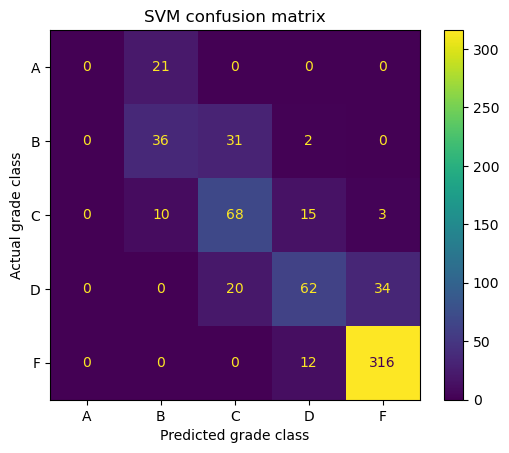

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
# Create display object with the correct display labels (grade class letter)
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=optimised_svm_model.classes_)

# Make the confusion matrix into a pyplot
svm_cm_display.plot()
plt.title("SVM confusion matrix")
plt.xlabel("Predicted grade class")
plt.ylabel("Actual grade class")
plt.show()

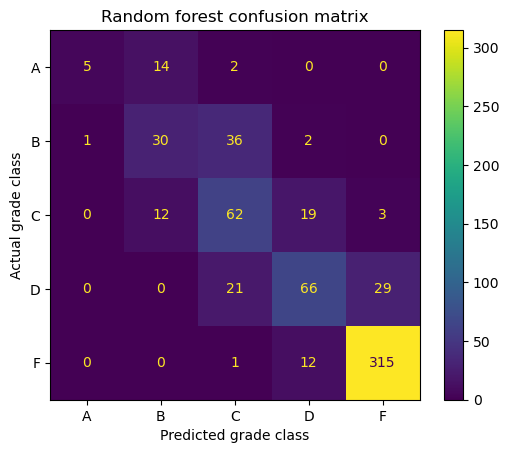

In [64]:
# Create the display object with the correct labels
rf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=optimised_rf_model.classes_)

# Make the confusion matrix into a pyplot
rf_cm_display.plot()
plt.title("Random forest confusion matrix")
plt.xlabel("Predicted grade class")
plt.ylabel("Actual grade class")
plt.show()

As we can see across both models' confusion matrix, the main/leading diagonal has the highest proportion of values which represents the True Positives. Adjacent grade classes to the True Positives have the next highest frequencies, which is expected are these are most likely to be misclassified.

A significant issue is the 'Sensitivity' for the actual grade class A for both models (primarily the SVM). For the actual grade class 'A':
- SVM model has a sensitivity of 0%
- RF model has a sensitivity of 26%
This will be discussed in detail later. 

### Frequent Confusion (B-C) ###

A frequent confusion is between grade classes B and C which is present in both models:
- **SVM**: 31 actual 'B' grades were predicted as 'C' and 10 actual 'C' grades were predicted as 'B'
- **RF**: 36 actual 'B' grades were predicted as 'C' and 12 actual 'C' grades were predicted as 'B'

This seems reasonable as both of these grade classes are adjacent to each other (in terms of GPA score ranges), and hence misclassification between these may be more frequent compared to grade classes that are separated by a wider margin (e.g., A and F). 

Possible explanations for the misclassifications include:
- A B grade student may have similar study hours to an average C grade student, but may have different study methods which may differ in efficiency and may result in a misclassification (as a C student). This highlights that number of weekly study hours may not effectively capture academic performance. For example two students may study for 10 hours per week, but one student passively studies (and recieves a C) while the other student actively studies (and recieves a B), hence the number of hours studied does not provide a strong insight into study quality.
- Some B and C grade students may have a similar number of absences, however B students may be more likely to watch recordings/catch up in alternate methods compared to C students hence improving their academic performance, but may be misclassified as C students simply due to the number of absences.

Furthermore, the classification models give equal importance to all features in the prediction of the grade class. However in reality, some features may contribute more to the grade class than others, and patterns in the other features may lead to models misclassifying B/C students. For example, two students who have very similar values in all features except for their weekly study time may be classified as the same grade (C), while in reality the weekly study time may the driving factor to determine one's grade, and hence the difference between their study times gets overlooked by the model because it equally focuses on their similarity in insignicant features. 

Thus common patterns in some features and slight differences in significant features may be overall classified together (as B or C). To mitigate this, the significant features (e.g., weekly study time) should be weighted more compared to features with lower impact on grade class (e.g., parental support) which would accurately differentiate between students grade classes even with small differences in these features.


### Comparing performances and Bias/Variation ###

Looking purely at the scores of both models against the training and testing data:

In [65]:
optimised_svm_model.score(X_train, y_train)

0.7663487738419619

In [66]:
optimised_svm_model.score(X_test, y_test)

0.765079365079365

In [67]:
optimised_rf_model.score(X_train, y_train)

0.8351498637602179

In [68]:
optimised_rf_model.score(X_test, y_test)

0.7587301587301587

We can see that the SVM model has a slightly better score on the test data (0.77) compared to the RF model (0.76). 

While the SVM model performs with an almost identical score on the train data (0.77), the RF model performes significantly higher on the train data (0.84), which indicates a high degree of **overfitting**. This overfitting of the RF model is a significant problem although it has a relatively **low bias**, it will have a **high variance** on new data (since it will fluctuate more on different data). Comparatively, the SVM model has a **slightly higher bias** as shown by its relatively poor performance on the training data, suggesting its inability to learn the deeper patterns, while it has **extremely low variance**, performing almost identically on unseen test data. 

Based off this, the consistency and low variance of the SVM model is preferred over the clearly overfitting and high variance RF model. 

Now looking at the confusion matrices we can see a significant issue for the SVM model. As shown below, all actual "A" grades are classified incorrectly as "B". This is likely due to there being a small proportion of students in training data that had the grade "A", and hence the model neglected this small proportion to attempt to fit better to the majority of the data. 
A similar issue also occurred in the RF model (to a lower degree), where the accuracy for actual "A" grades is extremely low, however, some of these (5) were accurately classified.

In [69]:
svm_cm

array([[  0,  21,   0,   0,   0],
       [  0,  36,  31,   2,   0],
       [  0,  10,  68,  15,   3],
       [  0,   0,  20,  62,  34],
       [  0,   0,   0,  12, 316]])

To compensate for this, we can use 'balanced' class weights to prioritise these rarer grade classes more and retrain our model. However this decreases the test scores quite significantly, and if we expect real world data to have a similar probability distribution of grade classes as the train data, it may be better to not balance the class weights.

In [70]:
bal_svm_model = SVC(C=100, gamma=0.002, kernel='rbf', class_weight='balanced', random_state=0)
bal_svm_model.fit(X_train, y_train)

print("Train score:", bal_svm_model.score(X_train, y_train))
print("Test score:", bal_svm_model.score(X_test, y_test))

Train score: 0.7397820163487738
Test score: 0.7380952380952381


In [71]:
bal_rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=15, min_samples_leaf=4, max_depth=None, bootstrap=True, class_weight='balanced', random_state=0)
bal_rf_model.fit(X_train,y_train)
print("Train score:", bal_rf_model.score(X_train,y_train))
print("Test score:", bal_rf_model.score(X_test,y_test))

Train score: 0.8208446866485014
Test score: 0.734920634920635


**Overall:**

The SVM model will be chosen due to its relatively low variation and is not clearly overfitting to the data, making it consistent and thus outweighing its disadvantage of having a higher bias and accuracy score

## TASK A.6 - Submission ##

In [72]:
new_df = pd.read_csv('Student_List_A2_Submission.csv')
new_df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport
0,5000,16,13.274090,27,1
1,5001,17,16.926360,6,2
2,5002,15,4.225258,15,3
3,5003,16,18.839829,17,3
4,5004,15,9.075075,6,2


In [73]:
# Check if any null vals
new_df.isnull().sum()

StudentID          0
Age                0
StudyTimeWeekly    0
Absences           0
ParentalSupport    0
dtype: int64

In [74]:
# Check for any abnormalities (e.g, negative absences)
new_df.describe()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport
count,161.000000,161.000000,161.000000,161.000000,161.000000
mean,5080.000000,16.428571,10.314005,15.217391,2.285714
std,46.620811,1.105183,5.601883,8.367120,1.114835
min,5000.000000,15.000000,0.001057,0.000000,0.000000
25%,5040.000000,15.000000,5.805674,8.000000,2.000000
50%,5080.000000,16.000000,10.437689,15.000000,2.000000
75%,5120.000000,17.000000,14.736337,23.000000,3.000000
max,5160.000000,18.000000,19.198334,29.000000,4.000000


In [75]:
# For X features, we use all rows [:] and the 'include' features [1,2,3,4]
X_new = new_df.iloc[:, [1,2,3,4]].values
# Scale values - normalise
X_new = sc.transform(X_new) 

# Generate predictions from both the optimised score model and the grade class balanced model
svm_predict_new = optimised_svm_model.predict(X_new)
svm_bal_new = bal_svm_model.predict(X_new) # This is a better model to use only if predicted = "B"

for i in range(len(svm_predict_new)):
    # if predicted is B, check if it should really be A or just B using balanced model
    if svm_predict_new[i] == "B":
        svm_predict_new[i] = svm_bal_new[i]

In [76]:
# Create the final data frame to submit with student id and predicted grades
submit_df = pd.DataFrame(
    {
        'StudentID':new_df['StudentID'],
        'GradeClass':svm_predict_new
    }
)
# Convert grade letters to numbers
submit_df['GradeClass'] = submit_df['GradeClass'].map({
    'A': 0,
    'B': 1, 
    'C': 2,
    'D': 3,
    'F': 4
})
# Write the data frame as a CSV file without indices. 
submit_df.to_csv("A2_grade_predictions_svm_halfbal.csv", index=False)

## Task B.1 - Life expectancy dataset (WHO) ##

Link (also in references): https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

Note: it will be required to download the data and place it within the same folder as this current file, in order to run the following code blocks. 

### Data Wrangling, Feature Selection and Visualisations ### 

**Why I chose this dataset**:
- Used a variety of numerical features relating to country population health/economic status, which makes it useful for k-means clustering which operates to group continuous numerical variables into clusters to identify patterns/correlations 
- Relationships between particular features seemed interesting and did not have concrete and definitive answers, for example the relationship between GDP and infant deaths or life expectancy and alcohol consumption
- This area of unknown classification is exactly what clustering (unsupervised learning) is
- The data looked incredibly messy for many features, allowing for extensive use of data pre-processing and cleaning
- The data was open source and easily accessible (via kaggle which allows direct download)
  

In [77]:
# Load the data set from the folder as a pandas data frame
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Since there are too many columns to be clearly displayed using the data frame's head, we can look at the column names separately and then choose 2 features we would like to analyse with k-means clustering.

The 2 features must be numerical variables in order to perform clustering. I will select "Life expectancy" and "Alcohol" as these may have an interesting association and countries may be able to later be classified into different groups based which cluster they belong to. 
Although research (refer to references) has shown that excessive alcohol consumption may be detrimental to health and thus reducing life expectancy, there may be deeper relationships which could be highlighted in the clustering. For example, alcohol consumption level might be an indication to the countries GDP/economic state in general which may subsequently lead to a higher life expectancy as more resources and support can be implemented. 

Thus depending on the cluster groups formed, we can learn patterns between these features making it quite interesting since there is no clear intuitive trend between life expectancy of a country and their average alcohol consumption. 

In [78]:
# View all features in the data frame and their specific column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [79]:
# Choose Life expectancy and Alcohol consumption as the 2 numerical features to analyse
# Rename both of the columns appropriately without the spaces and uppercase letters
df = df.rename(columns={"Life expectancy ":"Life Expectancy", "Alcohol":"Alcohol Consumption"})
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol Consumption', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [80]:
# Check if there are any missing (null) values in alcohol consumption and life expectancy
df[["Life Expectancy", "Alcohol Consumption"]].isnull().sum()

Life Expectancy         10
Alcohol Consumption    194
dtype: int64

We can see that there are 10 null values in life expectancy and 194 null values in Alcohol consumption. We can look closely at these values.

In [81]:
# Show null values in either the life expectancy or the alcohol consumption
df[df["Life Expectancy"].isnull() | df["Alcohol Consumption"].isnull()]

,Country,Year,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol Consumption,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [82]:
# Now show entries that are empty in both features (life expectancy and alcohol consumption)
df[df["Life Expectancy"].isnull() & df["Alcohol Consumption"].isnull()]

,Country,Year,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol Consumption,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.12237,292.0,0.1,0.1,0.779,14.2


It may first be beneficial to remove this entry that has null values for both life expectancy and alcohol consumption, as estimating both of these features would be complete falsification of the data entry and would not be effective.
To delete this entry, we could simply remove the entry number 1958, or we could more generally specify our data frame to only contain values that do **not** have both null values. 

In [83]:
# Makes data frame only contain entries that have non-null values in Life Expectancy or Alcohol Consumption
df = df[df["Life Expectancy"].notna() | df["Alcohol Consumption"].notna()]

# Now looking at the entries that have both null values will give an empty data frame, which means we successfully deleted the invalid entry
df[df["Life Expectancy"].isnull() & df["Alcohol Consumption"].isnull()]

,Country,Year,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol Consumption,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


To estimate our other entries that have only one null value in a selected feature, it would not be appropriate to simply calculate the mean/median of Life Expectancy and Alcohol Consumption and just paste it into all the empty spots. This is because it would generate many data entries (especially for Alcohol Consumption) that are not based on any information regarding the country at that year, and hence would dump all missing entries into a common median/mean for the entire column regardless of Country and Year. 

For example, it would not be appropriate to provide a country the mean life expectancy of all countries, when it is known that the country has a relatively low life expectancy average. Similarly, it would not be suitable to provide a particular country's Alcohol Consumption entry at a particular year as the average of all other entries, when it is known that during that particular time period there was a specific pattern that affected alcohol consumption. 

A better approach should acknowledge the known data associated with that country as well as the time period (year), since these are the most critical factors that enable prediction of any country's Life Expectancy/Alcohol Consumption. 

For each life expectancy null entry, we can try to get the mean life expectancy value for that country across other adjacent years (1 year above and below), which should be a relatively strong estimate as the life expectancy value would be between these two values (assuming a regular trend). 
If either the country does not have entries (for the other 2 years) or some of these years also have null values, we must  drop/delete this value from the data frame as there is insufficient information to confidently estimate a life expectancy value. 

This can be done by creating a function that takes in each row/entry and decides whether it requires modification (i.e., if Life Expectancy is null and there is available info to make an estimation). If a null value cannot be estimated (insufficient year entries or null values within the other year entries), it will remain unchanged. Finally, we call `dropna` across only the Life Expectancy column to delete any remaining null values.  

In [84]:
# Creating the function to handle the null life expectancy filling 
def life_exp_fill(entry):
    # If looking at a null feature value - need to use pd.isnull since entry["Life Expectancy"] is a single value (potentially NaN)
    if pd.isnull(entry["Life Expectancy"]):
        # Search for previous year's country entry and store in a data frame
        past_yr = df[(df["Country"] == entry["Country"]) & (df["Year"] == entry["Year"]-1)]

        # Search for next year's country entry and store in a data frame
        next_yr = df[(df["Country"] == entry["Country"]) & (df["Year"] == entry["Year"]+1)]
        
        # If either years are empty (insufficient info) 
        if len(past_yr)==0 or len(next_yr)==0:
            print("Not enough other year entries - Could not estimate entry:", entry["Country"], entry ["Year"])
        # If either year has a null value as the first and only item in the series (insufficient info)
        # We need to use iloc to access the first row (which should normally be the only row), since past_yr and next_yr are actually data frames
        elif pd.isnull(past_yr["Life Expectancy"].iloc[0]) or pd.isnull(next_yr["Life Expectancy"].iloc[0]):
            print("Other years do not have enough info - Could not estimate entry:", entry["Country"], entry["Year"])
        # Otherwise make an estimation - calculate mean of the two other year values
        else:
            print("Successfully estimated:", entry["Country"], entry["Year"])
            entry["Life Expectancy"] = (past_yr["Life Expectancy"].iloc[0] + next_yr["Life Expectancy"].iloc[0]) / 2
    
    # If the filled entry is returned, it will remain in df after dropna
    # If a null entry could not be filled, it will still have NaN and thus will be deleted by NaN
    return entry
    
# Apply the life expectancy filling function to each entry of the life expectancy feature
df = df.apply(life_exp_fill, axis=1)
# Delete any values in life expectancy that are still empty
df = df.dropna(subset = ["Life Expectancy"])

Not enough other year entries - Could not estimate entry: Cook Islands 2013
Not enough other year entries - Could not estimate entry: Dominica 2013
Not enough other year entries - Could not estimate entry: Marshall Islands 2013
Not enough other year entries - Could not estimate entry: Monaco 2013
Not enough other year entries - Could not estimate entry: Nauru 2013
Not enough other year entries - Could not estimate entry: Niue 2013
Not enough other year entries - Could not estimate entry: Saint Kitts and Nevis 2013
Not enough other year entries - Could not estimate entry: San Marino 2013
Not enough other year entries - Could not estimate entry: Tuvalu 2013


As shown above, all Life Expectancy null values occurred in 2013 and did not have enough year entries to proceed with an estimation. So, essentially all of the null values in this column were dropped and no estimations were made. This is not too significant, given there were only 10 null values initially to consider for this feature. 

In [85]:
df[["Life Expectancy", "Alcohol Consumption"]].isnull().sum()

Life Expectancy          0
Alcohol Consumption    193
dtype: int64

As shown above, the null values in life expectancy have been resolved. 

Now, a similar process can be applied to the 193 null values in Alcohol Consumption. Using the same logic as above, we would like to generate estimations using a mean of the years above and below for that particular country. If the required information is unavaible, it would not be safe to make an estimation and hence the whole data entry must be removed before further analysis. 
Since there are much more values, we can also print the total number of successful estimations to quickly show how many of the 193 values were successfully estimated.

In [86]:
# Creating the function to handle the null alcohol consumption filling - very similar logic 
def alcohol_cons_fill(entry):    
    if pd.isnull(entry["Alcohol Consumption"]):
        # Search for previous year's country entry and store in a data frame
        past_yr = df[(df["Country"] == entry["Country"]) & (df["Year"] == entry["Year"]-1)]

        # Search for next year's country entry and store in a data frame
        next_yr = df[(df["Country"] == entry["Country"]) & (df["Year"] == entry["Year"]+1)]
        
        # If either years are empty (insufficient info) 
        if len(past_yr)==0 or len(next_yr)==0:
            print("Not enough other year entries - Could not estimate entry:", entry["Country"], entry ["Year"])
        # If either year has a null value as the first and only item in the series (insufficient info)
        # We need to use iloc to access the first row (which should normally be the only row), since past_yr and next_yr are actually data frames
        elif pd.isnull(past_yr["Alcohol Consumption"].iloc[0]) or pd.isnull(next_yr["Alcohol Consumption"].iloc[0]):
            print("Other years do not have enough info - Could not estimate entry:", entry["Country"], entry["Year"])
        # Otherwise make an estimation - calculate mean of the two other year values
        else:
            print("Successfully estimated:", entry["Country"], entry["Year"])
            entry["Alcohol Consumption"] = (past_yr["Alcohol Consumption"].iloc[0] + next_yr["Alcohol Consumption"].iloc[0]) / 2
    
    # If the filled entry is returned, it will remain in df after dropna
    # If a null entry could not be filled, it will still have NaN and thus will be deleted by NaN
    return entry

original_null_count = df["Alcohol Consumption"].isnull().sum()
# Apply the alcohol consumption filling function to each entry 
df = df.apply(alcohol_cons_fill, axis=1)
unsuccessful_counter = df["Alcohol Consumption"].isnull().sum()

# Delete any values in alcohol consumption that are still empty
df = df.dropna(subset = ["Alcohol Consumption"])
print("Could not successfully estimate:", unsuccessful_counter)
print("Successfully estimated :", original_null_count - unsuccessful_counter)

Not enough other year entries - Could not estimate entry: Algeria 2015
Not enough other year entries - Could not estimate entry: Angola 2015
Not enough other year entries - Could not estimate entry: Antigua and Barbuda 2015
Not enough other year entries - Could not estimate entry: Argentina 2015
Not enough other year entries - Could not estimate entry: Armenia 2015
Not enough other year entries - Could not estimate entry: Australia 2015
Not enough other year entries - Could not estimate entry: Austria 2015
Not enough other year entries - Could not estimate entry: Azerbaijan 2015
Not enough other year entries - Could not estimate entry: Bahamas 2015
Not enough other year entries - Could not estimate entry: Bahrain 2015
Not enough other year entries - Could not estimate entry: Bangladesh 2015
Not enough other year entries - Could not estimate entry: Barbados 2015
Not enough other year entries - Could not estimate entry: Belarus 2015
Not enough other year entries - Could not estimate entr

As shown by the detailed and comprehensive output for each null alcohol consumption entry, almost all entries did not have sufficient information to generate an estimate. Only a single successful estimation was made (Montenegro 2005). This was due to the high frequency of 2015 entries having missing alcohol consumption estimates, and hence it was impossible to generate an estimation using the year after as well (since the data ranges from the years 2000 to 2015).

Despite the low number of estimations made, it is still better than blindly filling in the null values using the mean/median of the full feature, as that would be quite likely to disrupt patterns and trends between the features. 

In [87]:
# We can see that the features have been cleaned with no more null values
df[["Life Expectancy", "Alcohol Consumption"]].isnull().sum()

Life Expectancy        0
Alcohol Consumption    0
dtype: int64

In [88]:
# Rough overall view of the features 
df[["Life Expectancy", "Alcohol Consumption"]].describe()

,Life Expectancy,Alcohol Consumption
count,2736.000000,2736.000000
mean,69.170504,4.614154
std,9.549744,4.050175
min,36.300000,0.010000
25%,63.100000,0.907500
50%,72.050000,3.770000
75%,75.600000,7.712500
max,89.000000,17.870000


Based on the numerical description of the features above, there are no immediate abnormalities or outliers that violate the restrictions for their particular contexts. 

It is important to note that Life Expectancy is measured as the average life length in years for each country's population, hence the minimum (36) and maximum (89) years are within the bounds, however the minimum life expectancy could be a potential outlier due to its significant distance from the mean (69).

Alcohol consumption is measured as the average consumption of pure alcohol in litres per capita (i.e, per individual in the country population) within that year. The minimum (0.01 L) and maximum (17.87 L) seem reasonable within the context as positive numbers, however the maximum has a significant distance from the mean (4.6) making it possible to be an outlier (also amplified by the relatively low standard deviation). 

Now plotting the two features to visualise the data:

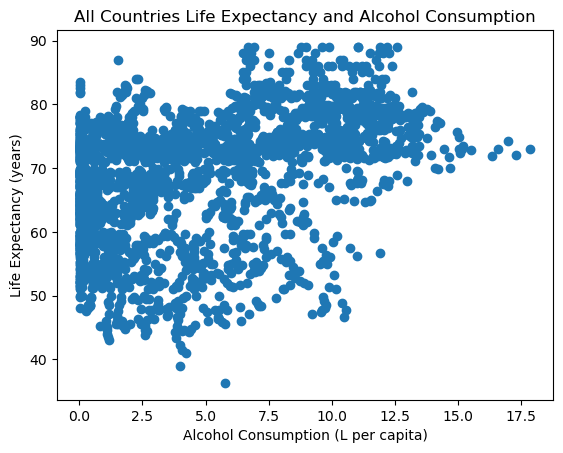

In [89]:
plt.scatter(df["Alcohol Consumption"], df["Life Expectancy"])
plt.xlabel("Alcohol Consumption (L per capita)")
plt.ylabel("Life Expectancy (years)")
plt.title("All Countries Life Expectancy and Alcohol Consumption")
plt.show()

### K-means clustering ###

Although not explicitly mentioned in the applied class, k-means cluster data should still be normalised to ensure the algorithm that determines cluster centres is not biased towards features that have larger scales. Since a greater distance on a wide scale may be equivalent to a smaller distance on a narrow scale since they both show the same significance. 
This is a similar logic to why a difference of 'x' from the mean is 'more rare' for smaller standard deviations compared to larger standard deviations, and hence should be emphasised more by the model regardless of the objective numerical magnitudes. 

However to aid interpretability of visualisations (in the same scale) and to avoid constant unscaling and re-scaling, we will not utilise scaled values.

**Cluster Parameters**
- n_clusters: Determines the number of clusters (groups) that will form
- n_init: Determines how many times the algorithm will pick centroids to determine the most common converging final clusters
- random_state: simply used for reproducibility (will always run the exact same way)
- init: we can also specify an array of starting points for centroids that will determine how the algorithm will run and potentially affect final clusters, however if it is unclear from the data visualisations where the clusters may lie, it is better not to use this.

Note: there are a few other parameters including tol and max_iter, which we will not consider, for our relatively simple clustering display

In [90]:
from sklearn.cluster import KMeans 

# Use the chosen cleaned features
X = df[["Life Expectancy", "Alcohol Consumption"]]

# Run the K-means clustering first using 2 clusters (like applied 7)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X) 

In [91]:
# Indicates the final cluster positions in terms of life expectancy and alcohol consumption
kmeans.cluster_centers_

array([[74.88833242,  5.66369015],
       [57.86550598,  2.5390642 ]])

In [92]:
kmeans.labels_  

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

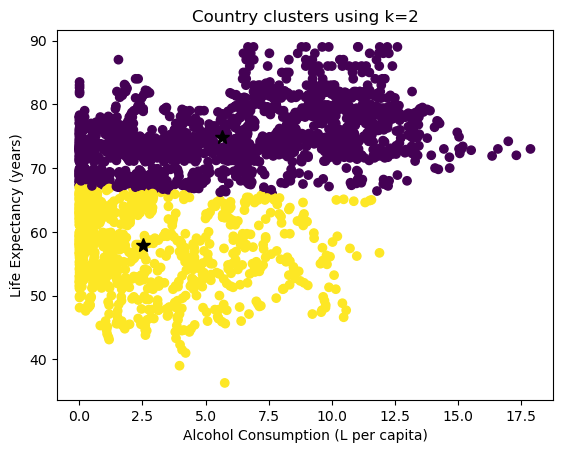

In [93]:
# Represent the cluster groups in the scatter plot (as shown in applied 7)
plt.scatter( 
x=X['Alcohol Consumption'],  
y=X['Life Expectancy'], 
c=kmeans.labels_)
plt.title("Country clusters using k=2")
plt.xlabel("Alcohol Consumption (L per capita)")
plt.ylabel("Life Expectancy (years)")

# Clearly represent the cluster centers using stars (as shown in applied 7)
plt.plot( 
kmeans.cluster_centers_[:,1], 
kmeans.cluster_centers_[:,0], 
'k*', 
markersize=10 
) 

As we can see, the clustering divides the data into two distinct groups, separated by a simple horizontal line at approximately Life_Expectancy = 67.
Although this offers an insight into how the different countries may be grouped, we can also expect there is likely more groupings (especially towards the high values of Alcohol Consumption and high Life Expectancy).

To quantify this hypothesis and objectively use measurements to determine the best number of clusters (i.e., the value for k), we can fit the k-means cluster on a range of different values and the value that results in the best clustering groups should be the number of clusters.
To determine the best clustering groups, we can use the within-cluster sum of squares (WCSS) which essentially determines how spaced apart the values in a particular cluster are from the centroid, and so minimising this value will ensure that data points are close to the centroids which likely means a better clustering. 

However, as k increases, we will always decrease the WCSS (since more clusters = more centroids = more compact clusters), assuming the clustering algorithm is valid. Yet, the rate at which we decrease the WCSS significantly slows down after some values of k, after which the difference in WCSS is almost insignificant. If we made k an extremely large number, each centroid would esentially map to a singular point or a few points, defeating the idea of clustering, so a balance between these must be made using a specific value of k (that is relatively small but also minimises the WCSS significantly). Determining this specific value of k is informally referred to as the **"Elbow method"**.

Note: the 'inertia' is the WCSS in sci-kit that measures the same thing - how compact the clusters are (by determining squared distances from each point to centroid - using squared prioritises the magnitude of the differences and ignores positive or negative sign)

In [ ]:
# Calculate WCSS for k from 1 to 8 (inclusive)
wcss_scores = []
k_range = range(1, 9)

# iterate through 9 times using a different value for k each time
for k in k_range:
    # Create a new kmeans model for each cluster value and calculate its "inertia" (WCSS)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    
    # add the WCSS value for this particular number of clustering into the list
    wcss_scores.append(kmeans.inertia_)

# Create the elbow plot 
plt.plot(k_range, wcss_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS/inertia value')
plt.title('Elbow Method Graph')


NameError: name 'X_scaled' is not defined

As shown by the graph above, after 5 clusters, the WCSS decreases extremely slowly, however from 1 to 4 the WCSS decreases rapidly. Hence from this we can estimate that using k = 5 for our k-means clustering would ensure all groups are relatively compact while also producing a meaningful group distribution of our dataset. 

In [ ]:
# Run the K-means clustering first using 5 clusters (as optimally decided above)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0).fit(X) 

# Represent the cluster groups in the scatter plot (as shown in applied 7)
plt.scatter( 
x=X['Alcohol Consumption'],  
y=X['Life Expectancy'], 
c=kmeans.labels_)
# Give title and axis labels
plt.title("Country clusters using k = 5")
plt.xlabel("Alcohol Consumption (L per capita)")
plt.ylabel("Life Expectancy (years)")

# Clearly represent the cluster centers using stars (as shown in applied 7)
plt.plot( 
kmeans.cluster_centers_[:,1], 
kmeans.cluster_centers_[:,0], 
'k*', 
markersize=10 
) 

### Results and patterns ###
We can see that the 5-means clustering is significantly better than the 2-means clustering since it meaningfully groups the various different characteristics of the graph (low-level, mid-level, and high-level alcohol consumption and their associated life expectancy groups)

Before clustering, based on my previous knowledge and basic research into the effect of alcohol consumption on health, I expected to see some of the following patterns:
- An extremely low alcohol consumption would likely be correlated with a low life expectancy, since it may mean limited access to alcohol and potentially other resources (i.e., due to being a lower-income country).
- A moderate level of alcohol consumption would likely be corrleated with the highest life expectancy, since moderate levels of alcohols have been shown to have some health benefits but more importantly can be seen as an indicator of the population's socioeconomic status and hence could contribute to a greater life expectancy
- A very high level of alcohol consumption would likely be correlated with a low life expectancy, since overuse of alcohol poses various safety and health hazards that may decrease the population's life expectancy.

After clustering, the results broadly aligned with the expectations discussed above (e.g., the highest life expectancy was centred around a moderate level of alcohol consumption - green cluster), however some notable differences emerged:
- Low levels of alcohol consumption had the greatest frequency and were widely dispersed across the life expectancy levels (highest variance)
- Higher levels of alcohol consumption (past 12.5 L per capita) was exclusively associated with the "yellow" cluster which had a high life expectancy.


# References #

- https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset - used for learning additional information about the data column measurements. For instance, it was specified that absences refers to the number of absences during a school year. 
- https://scikit-learn.org/stable/user_guide.html - used for learning about syntax for scikit learn (task A.3)
- https://www.youtube.com/watch?v=fSytzGwwBVw - used for learning about cross validation as an efficient way to use small amounts of data for training/testing
- https://blog.dailydoseofds.com/p/is-data-normalization-always-necessary - used for learning about the use of normalisation and scaling
- https://www.ibm.com/think/topics/support-vector-machine - used for learning about theory regarding Support Vector Machines and the functionality of kernels
- https://scikit-learn.org/stable/modules/svm.html - used for learning about SVM parameters and more theory regarding which kernels are better for different situations
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html - GridSearch for optimising parameters
- https://www.youtube.com/watch?v=ZVR2Way4nwQ - Learning about the Decision tree algorithm in more detail
- https://www.youtube.com/watch?v=v6VJ2RO66Ag - Learning about Random Forests in more detail and also about how the parameters work
- https://www.geeksforgeeks.org/machine-learning/hyperparameters-of-random-forest-classifier/ - Detailed overview on each random forest parameter
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification - used for basic learning on MLPClassifier and its use
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html - used for learning how to display the confusion matrix cleanly
- https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data - dataset used for Task B
- https://www.nature.com/articles/s41598-022-11427-x#:~:text=Nearly%20one%20out%20of%204,is%20at%20risk%20for%20addiction. - (research) used as supplementary research prior to deciding features to analyse and confirming dataset
- https://medium.com/data-science/kmeans-hyper-parameters-explained-with-examples-c93505820cd3: Reading to determine use of parameters and how to optimise them
- https://www.scikit-yb.org/en/latest/api/cluster/elbow.html: used for learning about the elbow method to determine the optimal number of clusters (i.e., value for k in k-means clustering)